In [1]:
import sys, operator, os, string, re, random, math
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

In [2]:
f = open("A7871107.txt")

In [3]:
line_num = 0
speech_dict = {}
tokens = []
text = []

In [4]:
for line in f:
    line = re.sub("[\[].*?[\]]", "", line)
    line = line.replace(".","")
    line = line.replace("!","")
    line = line.replace("?","")
    line = line.replace("xxx","")
    line = line.replace("yyy","")
    line = line.replace("zzz","")
    line = line.replace("(g)","g")
    line = line.replace("<", "")
    line = line.replace(">", "")
    line = line.replace("-", " ")
    line = line.replace("(", "")
    line = line.replace(")", "")
    line = line.replace("+", "")
    line = line.replace("/", "")
    line = line.replace('"', "")
    line = line.replace(",", "")
    line = line.replace("VCM0", "VCM")
    line = line.replace("0 ", "")
    
    speech_line = line.strip().strip('\n').strip()
    token_list = speech_line.split()

    for word in token_list:
        if word[0]=="&" or word[0]=="VCM" or word[0]=="VCM0":
            token_list.remove(word)
    if token_list[0][0] != "@":
        text.append(token_list)

In [5]:
f.close()

In [6]:
time_dict_fa1 = dict()
time_dict_fc1 = dict()
time_dict_chi = dict()
time_dict_ma1 = dict()
for i in range(len(text)):
    if text[i][0][0] == "*":
        time = text[i][-1].split("_")
        start = int(time[0][1:])
        end = int(time[1][:-1])
        duration = end - start
        word_count = len(text[i][1:-1])
        if text[i][0] == "*FA1:":
            time_dict_fa1[''.join(text[i][1:-1])] = [word_count, start, end, duration]
        elif text[i][0] == "*FC1:":
            time_dict_fc1[''.join(text[i][1:-1])] = [word_count, start, end, duration]
        elif text[i][0] == "*MA1:":
            time_dict_ma1[''.join(text[i][1:-1])] = [word_count, start, end, duration]
        elif text[i][0] == "*CHI:":
            time_dict_chi[''.join(text[i][1:-1])] = [word_count, start, end, duration]


In [7]:
time_list = []
for i in range(len(text)):
    if text[i][0][0] == "*":
        time = text[i][-1].split("_")
        start = int(time[0][1:])
        end = int(time[1][:-1])
        duration = end - start
        word_count = len(text[i][1:-1])
        time_list.append((text[i][0], word_count, start, end, duration))
print(time_list[0:11])

[('*FA1:', 2, 25580, 27740, 2160), ('*FA1:', 1, 34020, 36130, 2110), ('*FA1:', 1, 37415, 37845, 430), ('*FA1:', 1, 38920, 39200, 280), ('*FA1:', 3, 43560, 44440, 880), ('*FA1:', 1, 46500, 47210, 710), ('*FA1:', 3, 50343, 51923, 1580), ('*CHI:', 0, 56915, 57445, 530), ('*FA1:', 1, 57640, 58280, 640), ('*CHI:', 0, 58858, 59266, 408), ('*FA1:', 1, 59380, 60020, 640)]


In [12]:
participants = {"FA1" : 1, "FC1" : 2, "MA1" : 3, "CHI" : 4}
colormapping = {"FA1" : "C0", "FC1" : "C1", "MA1" : "C2", "CHI" : "C3"}

In [13]:
verts = []
colors = []
for t in time_list:
    v = [(t[2], participants[t[0][1:-1]]-.4),
        (t[2], participants[t[0][1:-1]]+.4),
        (t[3], participants[t[0][1:-1]]+.4),
        (t[3], participants[t[0][1:-1]]-.4),
        (t[2], participants[t[0][1:-1]]-.4),]
    verts.append(v)
    colors.append(colormapping[t[0][1:-1]])

bars = PolyCollection(verts, facecolors = colors)

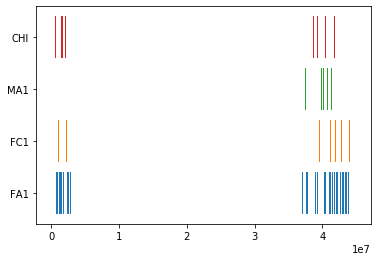

In [14]:
fig, ax = plt.subplots()
ax.add_collection(bars)
ax.autoscale()
ax.set_yticks([1,2,3,4])
ax.set_yticklabels(list(participants.keys()))
plt.savefig("vis_A7871107.png")